<a href="https://colab.research.google.com/github/tariqulq-cyber/Pemrosesan-teks-praktek/blob/main/Klasifikasi%20Data/Klasifikasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5220411053_MOUHAMMAD TARIQOUL QALAM

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/content/drive/MyDrive/pemrosesan teks teori/labeled 300_dataa.csv')
df

,userName,at,content,score,thumbsUpCount,content_processed_FINAL,tokenize_review,no_symbol,label
0,YT•RIZ GANT OFFICIAL,10/21/2025 15:36,game nya susah banget anj cuman buat login bik...,1,0,game susah banget anjing cuman login akun suli...,"['game', 'susah', 'banget', 'anjing', 'cuman',...","['game', 'susah', 'banget', 'anjing', 'cuman',...",negative
1,Muhamad Rayhan Al Fazry,10/6/2025 14:29,game hebat,5,0,game hebat,"['game', 'hebat']","['game', 'hebat']",positive
2,muhammad ridho official,10/21/2025 14:42,not good,1,0,not good,"['not', 'good']","['not', 'good']",negative
3,Fatur Rahman,10/21/2025 13:56,bagus,5,0,bagus,['bagus'],['bagus'],positive
4,rmdn ballboy,10/21/2025 13:23,i really love this game but i'm always disappo...,1,0,really love this game but im always disappoint...,"['really', 'love', 'this', 'game', 'but', 'im'...","['really', 'love', 'this', 'game', 'but', 'im'...",negative
...,...,...,...,...,...,...,...,...,...
295,Halimi SISKO,10/6/2025 17:10,"pleaselah, kenapa salah baned ip mulu, main se...",4,0,pleaselah salah baned ip mulu main sehat diban...,"['pleaselah', 'salah', 'baned', 'ip', 'mulu', ...","['pleaselah', 'salah', 'baned', 'ip', 'mulu', ...",positive
296,Dhika,10/6/2025 16:21,"makasih udah buat game ini, karna dari game in...",5,0,makasih udah game karna game ajar gaul ajar ek...,"['makasih', 'udah', 'game', 'karna', 'game', '...","['makasih', 'udah', 'game', 'karna', 'game', '...",positive
297,Nathan Niel,10/6/2025 16:11,"this this a good game but, maybe u can fix som...",4,0,this this good game but maybe can fix some bug...,"['this', 'this', 'good', 'game', 'but', 'maybe...","['this', 'this', 'good', 'game', 'but', 'maybe...",positive
298,Prabu,10/6/2025 15:20,i like this game alooott,5,0,like this game alooott,"['like', 'this', 'game', 'alooott']","['like', 'this', 'game', 'alooott']",positive


mising data

In [60]:
df.isnull().sum()

,0
userName,0
at,0
content,0
score,0
thumbsUpCount,0
content_processed_FINAL,0
tokenize_review,0
no_symbol,0
label,0


menghapus duplikat

In [61]:
# Cek jumlah duplikat sebelum penghapusan
print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")
print(f"Jumlah duplikat di kolom 'content' sebelum penghapusan: {df.duplicated(subset=['content']).sum()}")

# Menghapus duplikat berdasarkan kolom 'content'
df.drop_duplicates(subset=['content'], inplace=True)

# Cek jumlah duplikat setelah penghapusan
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
print(f"Jumlah duplikat di kolom 'content' setelah penghapusan: {df.duplicated(subset=['content']).sum()}")

df.head()

Jumlah baris sebelum menghapus duplikat: 300
Jumlah duplikat di kolom 'content' sebelum penghapusan: 0
Jumlah baris setelah menghapus duplikat: 300
Jumlah duplikat di kolom 'content' setelah penghapusan: 0


,userName,at,content,score,thumbsUpCount,content_processed_FINAL,tokenize_review,no_symbol,label
0,YT•RIZ GANT OFFICIAL,10/21/2025 15:36,game nya susah banget anj cuman buat login bik...,1,0,game susah banget anjing cuman login akun suli...,"['game', 'susah', 'banget', 'anjing', 'cuman',...","['game', 'susah', 'banget', 'anjing', 'cuman',...",negative
1,Muhamad Rayhan Al Fazry,10/6/2025 14:29,game hebat,5,0,game hebat,"['game', 'hebat']","['game', 'hebat']",positive
2,muhammad ridho official,10/21/2025 14:42,not good,1,0,not good,"['not', 'good']","['not', 'good']",negative
3,Fatur Rahman,10/21/2025 13:56,bagus,5,0,bagus,['bagus'],['bagus'],positive
4,rmdn ballboy,10/21/2025 13:23,i really love this game but i'm always disappo...,1,0,really love this game but im always disappoint...,"['really', 'love', 'this', 'game', 'but', 'im'...","['really', 'love', 'this', 'game', 'but', 'im'...",negative


steming

In [62]:
!pip install Sastrawi

In [63]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import ast
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian'))

# Define a function to process tokens: parse, remove stopwords, lowercase, strip, then stem
def process_tokens_for_stemming(tokens_str):
    # 1. Parse string representation of list to actual list
    try:
        tokens = ast.literal_eval(tokens_str)
    except (ValueError, SyntaxError):
        # Handle cases where parsing might fail, return empty list
        tokens = []

    # Ensure tokens are strings before processing, convert to lowercase, strip whitespace, and remove stopwords
    processed_tokens = []
    for token in tokens:
        # Convert to string in case some elements are not strings (e.g., numbers)
        clean_token = str(token).strip().lower()
        if clean_token and clean_token not in stop_words: # Check if not empty and not a stopword
            processed_tokens.append(clean_token)

    # 2. Stem the remaining tokens
    stemmed_tokens = [stemmer.stem(token) for token in processed_tokens]
    return stemmed_tokens

# Apply the combined processing to the 'no_symbol' column
df['stemmed_review'] = df['no_symbol'].apply(process_tokens_for_stemming)
df.head()

,userName,at,content,score,thumbsUpCount,content_processed_FINAL,tokenize_review,no_symbol,label,stemmed_review
0,YT•RIZ GANT OFFICIAL,10/21/2025 15:36,game nya susah banget anj cuman buat login bik...,1,0,game susah banget anjing cuman login akun suli...,"['game', 'susah', 'banget', 'anjing', 'cuman',...","['game', 'susah', 'banget', 'anjing', 'cuman',...",negative,"[game, susah, banget, anjing, cuman, login, ak..."
1,Muhamad Rayhan Al Fazry,10/6/2025 14:29,game hebat,5,0,game hebat,"['game', 'hebat']","['game', 'hebat']",positive,"[game, hebat]"
2,muhammad ridho official,10/21/2025 14:42,not good,1,0,not good,"['not', 'good']","['not', 'good']",negative,"[not, good]"
3,Fatur Rahman,10/21/2025 13:56,bagus,5,0,bagus,['bagus'],['bagus'],positive,[bagus]
4,rmdn ballboy,10/21/2025 13:23,i really love this game but i'm always disappo...,1,0,really love this game but im always disappoint...,"['really', 'love', 'this', 'game', 'but', 'im'...","['really', 'love', 'this', 'game', 'but', 'im'...",negative,"[really, love, this, game, but, im, always, di..."


ekstraksi fitur Bag of Words (BoW):

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# 1. Konversi list of stemmed tokens menjadi string tunggal untuk setiap ulasan
df['stemmed_review_str'] = df['stemmed_review'].apply(lambda x: ' '.join(x))

# 2. Konversi kolom 'label' ke format numerik (misal: positive=1, negative=0)
df['label_numerical'] = df['label'].map({'positive': 1, 'negative': 0})

# 3. Definisikan fitur (X) dan target (y)
X = df['stemmed_review_str']
y = df['label_numerical']

# 4. Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Instantiate CountVectorizer
vectorizer = CountVectorizer()

# 6. Fit the vectorizer to the training data and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# 7. Transform X_test using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test)

# 8. Print the shape of the generated feature matrices
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")

Shape of X_train: (240,)
Shape of X_test: (60,)
Shape of y_train: (240,)
Shape of y_test: (60,)
Shape of X_train_bow: (240, 743)
Shape of X_test_bow: (60, 743)


### Menampilkan Contoh Fitur dari X_train_bow

In [65]:
import pandas as pd

# Dapatkan nama fitur (kata-kata) dari vectorizer BoW
bow_feature_names = vectorizer.get_feature_names_out()

# Konversi X_train_bow ke DataFrame untuk tampilan yang lebih mudah
# Kita akan menampilkan beberapa baris dan kolom pertama
df_bow_sample = pd.DataFrame(X_train_bow.toarray(), columns=bow_feature_names).head()
display(df_bow_sample)

,aap,abdet,abis,acc,account,acur,ad,address,ae,after,...,world,would,wrong,xl,yaa,yaampun,yes,you,your,youtuber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
df_bow_sample['anak'].plot(kind='hist', bins=20, title='anak')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['auto'].plot(kind='hist', bins=20, title='auto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['bagus'].plot(kind='hist', bins=20, title='bagus')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['band'].plot(kind='hist', bins=20, title='band')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample.plot(kind='scatter', x='anak', y='auto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample.plot(kind='scatter', x='auto', y='bagus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample.plot(kind='scatter', x='bagus', y='band', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample.plot(kind='scatter', x='band', y='bangeetttttt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['anak']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_bow_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('anak')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['auto']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_bow_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('auto')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['bagus']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_bow_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('bagus')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['band']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_bow_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('band')

from matplotlib import pyplot as plt
df_bow_sample['anak'].plot(kind='line', figsize=(8, 4), title='anak')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['auto'].plot(kind='line', figsize=(8, 4), title='auto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['bagus'].plot(kind='line', figsize=(8, 4), title='bagus')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_bow_sample['band'].plot(kind='line', figsize=(8, 4), title='band')
plt.gca().spines[['top', 'right']].set_visible(False)

### Ekstraksi Fitur TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to the training data and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# 3. Transform X_test using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Print the shape of the generated feature matrices
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (240, 743)
Shape of X_test_tfidf: (60, 743)


### Menampilkan Contoh Fitur dari X_train_tfidf

In [67]:
# Dapatkan nama fitur (kata-kata) dari tfidf_vectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi X_train_tfidf ke DataFrame untuk tampilan yang lebih mudah
# Kita akan menampilkan beberapa baris dan kolom pertama
df_tfidf_sample = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_feature_names).head()
display(df_tfidf_sample)

,aap,abdet,abis,acc,account,acur,ad,address,ae,after,...,world,would,wrong,xl,yaa,yaampun,yes,you,your,youtuber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42317
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


from matplotlib import pyplot as plt
df_tfidf_sample['anak'].plot(kind='hist', bins=20, title='anak')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['auto'].plot(kind='hist', bins=20, title='auto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['bagus'].plot(kind='hist', bins=20, title='bagus')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['band'].plot(kind='hist', bins=20, title='band')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample.plot(kind='scatter', x='anak', y='auto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample.plot(kind='scatter', x='auto', y='bagus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample.plot(kind='scatter', x='bagus', y='band', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample.plot(kind='scatter', x='band', y='bangeetttttt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['anak']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('anak')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['auto']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('auto')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['bagus']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('bagus')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['aap']
  ys = series['band']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf_sample.sort_values('aap', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aap')
_ = plt.ylabel('band')

from matplotlib import pyplot as plt
df_tfidf_sample['anak'].plot(kind='line', figsize=(8, 4), title='anak')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['auto'].plot(kind='line', figsize=(8, 4), title='auto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['bagus'].plot(kind='line', figsize=(8, 4), title='bagus')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf_sample['band'].plot(kind='line', figsize=(8, 4), title='band')
plt.gca().spines[['top', 'right']].set_visible(False)

### Ekstraksi Fitur - Word2Vec Embeddings

In [68]:
print("Memeriksa dan menginstal gensim...")
!pip install gensim
print("Gensim siap digunakan.")

Memeriksa dan menginstal gensim...
Gensim siap digunakan.


In [71]:
import gensim.models
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Latih model Word2Vec
# Kolom 'stemmed_review' sudah berisi list token, yang cocok untuk pelatihan Word2Vec.
print("Melatih model Word2Vec...")
word2vec_model = Word2Vec(sentences=df['stemmed_review'], vector_size=100, window=5, min_count=1, workers=4, seed=42)
print("Model Word2Vec berhasil dilatih.")
print(f"Ukuran Vokabulari: {len(word2vec_model.wv)}")

# 2. Fungsi untuk membuat vektor dokumen dengan merata-ratakan vektor kata
def document_vector(word_list, model):
    vectors = []
    for word in word_list:
        if word in model.wv:
            vectors.append(model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        # Kembalikan vektor nol jika tidak ada kata yang ditemukan di kosakata
        return np.zeros(model.vector_size)

# 3. Terapkan fungsi document_vector ke kolom 'stemmed_review'
df['document_embedding'] = df['stemmed_review'].apply(lambda x: document_vector(x, word2vec_model))

print("Embeddings dokumen berhasil dibuat.")
print(f"Bentuk embedding dokumen pertama: {df['document_embedding'].iloc[0].shape}")

# 4. Konversi list embedding dokumen menjadi array NumPy 2D
X_w2v = np.array(df['document_embedding'].tolist())

# 5. Pisahkan embedding Word2Vec ke dalam set pelatihan dan pengujian
# Menggunakan X dan y yang sudah didefinisikan sebelumnya, dengan random_state yang sama
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Tampilkan bentuk matriks fitur Word2Vec yang dihasilkan
print(f"Bentuk X_train_w2v: {X_train_w2v.shape}")
print(f"Bentuk X_test_w2v: {X_test_w2v.shape}")

Melatih model Word2Vec...
Model Word2Vec berhasil dilatih.
Ukuran Vokabulari: 856
Embeddings dokumen berhasil dibuat.
Bentuk embedding dokumen pertama: (100,)
Bentuk X_train_w2v: (240, 100)
Bentuk X_test_w2v: (60, 100)


### Unduh dan Muat GloVe Embeddings

In [72]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Lokasi untuk menyimpan file GloVe
glove_dir = './glove_data'
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

glove_file = os.path.join(glove_dir, 'glove.6B.50d.txt')

# Unduh GloVe jika belum ada
if not os.path.exists(glove_file):
    print("Mengunduh GloVe embeddings (glove.6B.50d.txt). Ini mungkin memakan waktu...")
    !wget -P {glove_dir} http://nlp.stanford.edu/data/glove.6B.zip
    !unzip -q {glove_dir}/glove.6B.zip -d {glove_dir}
    print("Pengunduhan dan ekstraksi selesai.")
else:
    print("GloVe embeddings sudah ada.")

# Memuat GloVe embeddings ke dalam dictionary
glove_vectors = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

print(f"Total {len(glove_vectors)} word vectors dimuat.")
print(f"Dimensi vektor GloVe: {len(next(iter(glove_vectors.values())))}")

GloVe embeddings sudah ada.
Total 400000 word vectors dimuat.
Dimensi vektor GloVe: 50


### Membuat Document Embeddings dengan GloVe

In [73]:
# Fungsi untuk membuat vektor dokumen dengan merata-ratakan vektor kata GloVe
def document_vector_glove(word_list, glove_model, embedding_dim=50):
    vectors = []
    for word in word_list:
        if word in glove_model:
            vectors.append(glove_model[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        # Kembalikan vektor nol jika tidak ada kata yang ditemukan di kosakata GloVe
        return np.zeros(embedding_dim)

# Terapkan fungsi document_vector_glove ke kolom 'stemmed_review'
df['document_embedding_glove'] = df['stemmed_review'].apply(lambda x: document_vector_glove(x, glove_vectors))

print("Embeddings dokumen GloVe berhasil dibuat.")
print(f"Bentuk embedding dokumen GloVe pertama: {df['document_embedding_glove'].iloc[0].shape}")

# Konversi list embedding dokumen GloVe menjadi array NumPy 2D
X_glove = np.array(df['document_embedding_glove'].tolist())

# Pisahkan embedding GloVe ke dalam set pelatihan dan pengujian
# Menggunakan X dan y yang sudah didefinisikan sebelumnya, dengan random_state yang sama
X_train_glove, X_test_glove, _, _ = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Tampilkan bentuk matriks fitur GloVe yang dihasilkan
print(f"Bentuk X_train_glove: {X_train_glove.shape}")
print(f"Bentuk X_test_glove: {X_test_glove.shape}")

Embeddings dokumen GloVe berhasil dibuat.
Bentuk embedding dokumen GloVe pertama: (50,)
Bentuk X_train_glove: (240, 50)
Bentuk X_test_glove: (60, 50)


### Klasifikasi dengan Naive Bayes (BoW dan TF-IDF)

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Naive Bayes dengan fitur Bag of Words (BoW) ---
print("### Naive Bayes dengan fitur Bag of Words (BoW) ###\n")

# 1. Inisialisasi classifier MultinomialNB
nb_bow_model = MultinomialNB()

# 2. Latih model
nb_bow_model.fit(X_train_bow, y_train)

# 3. Lakukan prediksi pada X_test_bow
y_pred_bow = nb_bow_model.predict(X_test_bow)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_bow = accuracy_score(y_test, y_pred_bow)
precision_bow = precision_score(y_test, y_pred_bow)
recall_bow = recall_score(y_test, y_pred_bow)
f1_bow = f1_score(y_test, y_pred_bow)

print(f"Accuracy (BoW): {accuracy_bow:.4f}")
print(f"Precision (BoW): {precision_bow:.4f}")
print(f"Recall (BoW): {recall_bow:.4f}")
print(f"F1-Score (BoW): {f1_bow:.4f}\n")

# --- Naive Bayes dengan fitur TF-IDF ---
print("### Naive Bayes dengan fitur TF-IDF ###\n")

# 1. Inisialisasi classifier MultinomialNB lain
nb_tfidf_model = MultinomialNB()

# 2. Latih model
nb_tfidf_model.fit(X_train_tfidf, y_train)

# 3. Lakukan prediksi pada X_test_tfidf
y_pred_tfidf = nb_tfidf_model.predict(X_test_tfidf)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf)
recall_tfidf = recall_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

print(f"Accuracy (TF-IDF): {accuracy_tfidf:.4f}")
print(f"Precision (TF-IDF): {precision_tfidf:.4f}")
print(f"Recall (TF-IDF): {recall_tfidf:.4f}")
print(f"F1-Score (TF-IDF): {f1_tfidf:.4f}")

### Naive Bayes dengan fitur Bag of Words (BoW) ###

Accuracy (BoW): 0.7500
Precision (BoW): 0.8000
Recall (BoW): 0.6667
F1-Score (BoW): 0.7273

### Naive Bayes dengan fitur TF-IDF ###

Accuracy (TF-IDF): 0.7167
Precision (TF-IDF): 0.7600
Recall (TF-IDF): 0.6333
F1-Score (TF-IDF): 0.6909


### Klasifikasi dengan Support Vector Machine (SVM) (BoW dan TF-IDF)

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Support Vector Machine (SVM) dengan fitur Bag of Words (BoW) ---
print("### Support Vector Machine (SVM) dengan fitur Bag of Words (BoW) ###\n")

# 1. Inisialisasi classifier SVC
svm_bow_model = SVC(random_state=42)

# 2. Latih model
svm_bow_model.fit(X_train_bow, y_train)

# 3. Lakukan prediksi pada X_test_bow
y_pred_bow_svm = svm_bow_model.predict(X_test_bow)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_bow_svm = accuracy_score(y_test, y_pred_bow_svm)
precision_bow_svm = precision_score(y_test, y_pred_bow_svm, zero_division=0)
recall_bow_svm = recall_score(y_test, y_pred_bow_svm, zero_division=0)
f1_bow_svm = f1_score(y_test, y_pred_bow_svm, zero_division=0)

print(f"Accuracy (BoW): {accuracy_bow_svm:.4f}")
print(f"Precision (BoW): {precision_bow_svm:.4f}")
print(f"Recall (BoW): {recall_bow_svm:.4f}")
print(f"F1-Score (BoW): {f1_bow_svm:.4f}\n")

# --- Support Vector Machine (SVM) dengan fitur TF-IDF ---
print("### Support Vector Machine (SVM) dengan fitur TF-IDF ###\n")

# 1. Inisialisasi classifier SVC lain
svm_tfidf_model = SVC(random_state=42)

# 2. Latih model
svm_tfidf_model.fit(X_train_tfidf, y_train)

# 3. Lakukan prediksi pada X_test_tfidf
y_pred_tfidf_svm = svm_tfidf_model.predict(X_test_tfidf)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_tfidf_svm = accuracy_score(y_test, y_pred_tfidf_svm)
precision_tfidf_svm = precision_score(y_test, y_pred_tfidf_svm, zero_division=0)
recall_tfidf_svm = recall_score(y_test, y_pred_tfidf_svm, zero_division=0)
f1_tfidf_svm = f1_score(y_test, y_pred_tfidf_svm, zero_division=0)

print(f"Accuracy (TF-IDF): {accuracy_tfidf_svm:.4f}")
print(f"Precision (TF-IDF): {precision_tfidf_svm:.4f}")
print(f"Recall (TF-IDF): {recall_tfidf_svm:.4f}")
print(f"F1-Score (TF-IDF): {f1_tfidf_svm:.4f}")

### Support Vector Machine (SVM) dengan fitur Bag of Words (BoW) ###

Accuracy (BoW): 0.6833
Precision (BoW): 0.6341
Recall (BoW): 0.8667
F1-Score (BoW): 0.7324

### Support Vector Machine (SVM) dengan fitur TF-IDF ###

Accuracy (TF-IDF): 0.7167
Precision (TF-IDF): 0.7600
Recall (TF-IDF): 0.6333
F1-Score (TF-IDF): 0.6909


### Klasifikasi dengan Support Vector Machine (SVM) (Word2Vec dan GloVe)

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Support Vector Machine (SVM) dengan fitur Word2Vec ---
print("### Support Vector Machine (SVM) dengan fitur Word2Vec ###\n")

# 1. Inisialisasi classifier SVC
svm_w2v_model = SVC(random_state=42)

# 2. Latih model
svm_w2v_model.fit(X_train_w2v, y_train)

# 3. Lakukan prediksi pada X_test_w2v
y_pred_w2v_svm = svm_w2v_model.predict(X_test_w2v)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_w2v_svm = accuracy_score(y_test, y_pred_w2v_svm)
precision_w2v_svm = precision_score(y_test, y_pred_w2v_svm, zero_division=0)
recall_w2v_svm = recall_score(y_test, y_pred_w2v_svm, zero_division=0)
f1_w2v_svm = f1_score(y_test, y_pred_w2v_svm, zero_division=0)

print(f"Accuracy (Word2Vec): {accuracy_w2v_svm:.4f}")
print(f"Precision (Word2Vec): {precision_w2v_svm:.4f}")
print(f"Recall (Word2Vec): {recall_w2v_svm:.4f}")
print(f"F1-Score (Word2Vec): {f1_w2v_svm:.4f}\n")

# --- Support Vector Machine (SVM) dengan fitur GloVe ---
print("### Support Vector Machine (SVM) dengan fitur GloVe ###\n")

# 1. Inisialisasi classifier SVC lain
svm_glove_model = SVC(random_state=42)

# 2. Latih model
svm_glove_model.fit(X_train_glove, y_train)

# 3. Lakukan prediksi pada X_test_glove
y_pred_glove_svm = svm_glove_model.predict(X_test_glove)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_glove_svm = accuracy_score(y_test, y_pred_glove_svm)
precision_glove_svm = precision_score(y_test, y_pred_glove_svm, zero_division=0)
recall_glove_svm = recall_score(y_test, y_pred_glove_svm, zero_division=0)
f1_glove_svm = f1_score(y_test, y_pred_glove_svm, zero_division=0)

print(f"Accuracy (GloVe): {accuracy_glove_svm:.4f}")
print(f"Precision (GloVe): {precision_glove_svm:.4f}")
print(f"Recall (GloVe): {recall_glove_svm:.4f}")
print(f"F1-Score (GloVe): {f1_glove_svm:.4f}")




### Support Vector Machine (SVM) dengan fitur Word2Vec ###

Accuracy (Word2Vec): 0.6333
Precision (Word2Vec): 0.6538
Recall (Word2Vec): 0.5667
F1-Score (Word2Vec): 0.6071

### Support Vector Machine (SVM) dengan fitur GloVe ###

Accuracy (GloVe): 0.6333
Precision (GloVe): 0.6176
Recall (GloVe): 0.7000
F1-Score (GloVe): 0.6562


### Klasifikasi dengan Logistic Regression (BoW dan TF-IDF)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Logistic Regression with Bag of Words (BoW) features ---
print("### Logistic Regression with Bag of Words (BoW) features ###\n")

# 1. Inisialisasi classifier LogisticRegression
# Use random_state=42 for reproducibility and max_iter=1000 for convergence
lr_bow_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Latih model
lr_bow_model.fit(X_train_bow, y_train)

# 3. Lakukan prediksi pada X_test_bow
y_pred_bow_lr = lr_bow_model.predict(X_test_bow)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_bow_lr = accuracy_score(y_test, y_pred_bow_lr)
precision_bow_lr = precision_score(y_test, y_pred_bow_lr, zero_division=0)
recall_bow_lr = recall_score(y_test, y_pred_bow_lr, zero_division=0)
f1_bow_lr = f1_score(y_test, y_pred_bow_lr, zero_division=0)

print(f"Accuracy (BoW): {accuracy_bow_lr:.4f}")
print(f"Precision (BoW): {precision_bow_lr:.4f}")
print(f"Recall (BoW): {recall_bow_lr:.4f}")
print(f"F1-Score (BoW): {f1_bow_lr:.4f}\n")

# --- Logistic Regression with TF-IDF features ---
print("### Logistic Regression with TF-IDF features ###\n")

# 1. Inisialisasi classifier LogisticRegression lain
lr_tfidf_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Latih model
lr_tfidf_model.fit(X_train_tfidf, y_train)

# 3. Lakukan prediksi pada X_test_tfidf
y_pred_tfidf_lr = lr_tfidf_model.predict(X_test_tfidf)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_tfidf_lr = accuracy_score(y_test, y_pred_tfidf_lr)
precision_tfidf_lr = precision_score(y_test, y_pred_tfidf_lr, zero_division=0)
recall_tfidf_lr = recall_score(y_test, y_pred_tfidf_lr, zero_division=0)
f1_tfidf_lr = f1_score(y_test, y_pred_tfidf_lr, zero_division=0)

print(f"Accuracy (TF-IDF): {accuracy_tfidf_lr:.4f}")
print(f"Precision (TF-IDF): {precision_tfidf_lr:.4f}")
print(f"Recall (TF-IDF): {recall_tfidf_lr:.4f}")
print(f"F1-Score (TF-IDF): {f1_tfidf_lr:.4f}")

### Logistic Regression with Bag of Words (BoW) features ###

Accuracy (BoW): 0.6667
Precision (BoW): 0.6250
Recall (BoW): 0.8333
F1-Score (BoW): 0.7143

### Logistic Regression with TF-IDF features ###

Accuracy (TF-IDF): 0.6500
Precision (TF-IDF): 0.6364
Recall (TF-IDF): 0.7000
F1-Score (TF-IDF): 0.6667


### Klasifikasi dengan Logistic Regression (Word2Vec dan GloVe)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Logistic Regression dengan fitur Word2Vec ---
print("### Logistic Regression dengan fitur Word2Vec ###\n")

# 1. Inisialisasi classifier LogisticRegression
lr_w2v_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Latih model
lr_w2v_model.fit(X_train_w2v, y_train)

# 3. Lakukan prediksi pada X_test_w2v
y_pred_w2v_lr = lr_w2v_model.predict(X_test_w2v)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_w2v_lr = accuracy_score(y_test, y_pred_w2v_lr)
precision_w2v_lr = precision_score(y_test, y_pred_w2v_lr, zero_division=0)
recall_w2v_lr = recall_score(y_test, y_pred_w2v_lr, zero_division=0)
f1_w2v_lr = f1_score(y_test, y_pred_w2v_lr, zero_division=0)

print(f"Accuracy (Word2Vec): {accuracy_w2v_lr:.4f}")
print(f"Precision (Word2Vec): {precision_w2v_lr:.4f}")
print(f"Recall (Word2Vec): {recall_w2v_lr:.4f}")
print(f"F1-Score (Word2Vec): {f1_w2v_lr:.4f}\n")

# --- Logistic Regression dengan fitur GloVe ---
print("### Logistic Regression dengan fitur GloVe ###\n")

# 1. Inisialisasi classifier LogisticRegression lain
lr_glove_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Latih model
lr_glove_model.fit(X_train_glove, y_train)

# 3. Lakukan prediksi pada X_test_glove
y_pred_glove_lr = lr_glove_model.predict(X_test_glove)

# 4. Hitung dan tampilkan metrik evaluasi
accuracy_glove_lr = accuracy_score(y_test, y_pred_glove_lr)
precision_glove_lr = precision_score(y_test, y_pred_glove_lr, zero_division=0)
recall_glove_lr = recall_score(y_test, y_pred_glove_lr, zero_division=0)
f1_glove_lr = f1_score(y_test, y_pred_glove_lr, zero_division=0)

print(f"Accuracy (GloVe): {accuracy_glove_lr:.4f}")
print(f"Precision (GloVe): {precision_glove_lr:.4f}")
print(f"Recall (GloVe): {recall_glove_lr:.4f}")
print(f"F1-Score (GloVe): {f1_glove_lr:.4f}")



### Logistic Regression dengan fitur Word2Vec ###

Accuracy (Word2Vec): 0.6333
Precision (Word2Vec): 0.6667
Recall (Word2Vec): 0.5333
F1-Score (Word2Vec): 0.5926

### Logistic Regression dengan fitur GloVe ###

Accuracy (GloVe): 0.5500
Precision (GloVe): 0.5405
Recall (GloVe): 0.6667
F1-Score (GloVe): 0.5970


### Klasifikasi dengan Long Short-Term Memory (LSTM) dan GloVe Embeddings

In [79]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Memastikan kolom 'label_numerical' sudah ada dan 'stemmed_review' berisi list of tokens
# (Ini sudah dilakukan di langkah sebelumnya)

# Persiapkan data teks dengan menggabungkan token menjadi string untuk Keras Tokenizer
X_text_glove = df['stemmed_review'].apply(lambda x: ' '.join(x))
y = df['label_numerical']

# 1. Pembagian data untuk konsistensi (menggunakan split yang sama)
X_train_text_glove, X_test_text_glove, y_train_lstm_glove, y_test_lstm_glove = train_test_split(X_text_glove, y, test_size=0.2, random_state=42)
print(f"Data split: X_train_text_glove shape {X_train_text_glove.shape}, X_test_text_glove shape {X_test_text_glove.shape}")
print(f"Data split: y_train_lstm_glove shape {y_train_lstm_glove.shape}, y_test_lstm_glove shape {y_test_lstm_glove.shape}")

# 2. Inisialisasi Tokenizer dan fit pada X_train_text_glove
tokenizer_glove = Tokenizer(num_words=None, oov_token="<unk>") # num_words=None untuk mempertahankan semua kata
tokenizer_glove.fit_on_texts(X_train_text_glove)
print(f"Tokenizer vocabulary size: {len(tokenizer_glove.word_index)}")

# 3. Konversi teks ke urutan angka
X_train_sequences_glove = tokenizer_glove.texts_to_sequences(X_train_text_glove)
X_test_sequences_glove = tokenizer_glove.texts_to_sequences(X_test_text_glove)

# 4. Tentukan panjang sekuens maksimum dari data pelatihan
max_sequence_length_glove = max([len(x) for x in X_train_sequences_glove])
print(f"Maximum sequence length: {max_sequence_length_glove}")

# 5. Lakukan padding pada sekuens pelatihan dan pengujian
X_train_padded_glove = pad_sequences(X_train_sequences_glove, maxlen=max_sequence_length_glove, padding='post')
X_test_padded_glove = pad_sequences(X_test_sequences_glove, maxlen=max_sequence_length_glove, padding='post')
print(f"Padded training sequences shape: {X_train_padded_glove.shape}")
print(f"Padded testing sequences shape: {X_test_padded_glove.shape}")

# 6. Buat matriks embedding dari GloVe
vocab_size_glove = len(tokenizer_glove.word_index) + 1 # +1 untuk padding/indeks 0
embedding_dim_glove = len(next(iter(glove_vectors.values()))) # Ambil dimensi dari glove_vectors yang sudah dimuat
embedding_matrix_glove = np.zeros((vocab_size_glove, embedding_dim_glove))

for word, i in tokenizer_glove.word_index.items():
    if word in glove_vectors:
        embedding_matrix_glove[i] = glove_vectors[word]
    # Kata-kata yang tidak ada di model GloVe akan tetap nol (diinisialisasi oleh np.zeros)

print(f"Embedding matrix (GloVe) shape: {embedding_matrix_glove.shape}")

# 7. Bangun model Sequential Keras
model_lstm_glove = Sequential()
model_lstm_glove.add(Embedding(input_dim=vocab_size_glove,
                    output_dim=embedding_dim_glove,
                    weights=[embedding_matrix_glove],
                    trainable=False)) # Gunakan embeddings yang sudah dilatih tanpa fine-tuning
model_lstm_glove.add(LSTM(units=100)) # Layer LSTM dengan 100 unit
model_lstm_glove.add(Dense(units=1, activation='sigmoid')) # Layer output untuk klasifikasi biner

# 8. Compile model
model_lstm_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm_glove.summary()

# 9. Latih model LSTM
epochs = 10
batch_size = 32
print(f"\nTraining LSTM model (GloVe) for {epochs} epochs with batch size {batch_size}...")
history_glove = model_lstm_glove.fit(X_train_padded_glove, y_train_lstm_glove, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
print("LSTM model (GloVe) trained.")

# 10. Evaluasi model
print("\nEvaluating LSTM model (GloVe)...")
y_pred_probs_lstm_glove = model_lstm_glove.predict(X_test_padded_glove)
y_pred_lstm_glove = (y_pred_probs_lstm_glove > 0.5).astype(int) # Konversi probabilitas ke label biner

accuracy_lstm_glove = accuracy_score(y_test_lstm_glove, y_pred_lstm_glove)
precision_lstm_glove = precision_score(y_test_lstm_glove, y_pred_lstm_glove, zero_division=0)
recall_lstm_glove = recall_score(y_test_lstm_glove, y_pred_lstm_glove, zero_division=0)
f1_lstm_glove = f1_score(y_test_lstm_glove, y_pred_lstm_glove, zero_division=0)

print(f"Accuracy (LSTM + GloVe): {accuracy_lstm_glove:.4f}")
print(f"Precision (LSTM + GloVe): {precision_lstm_glove:.4f}")
print(f"Recall (LSTM + GloVe): {recall_lstm_glove:.4f}")
print(f"F1-Score (LSTM + GloVe): {f1_lstm_glove:.4f}")

Data split: X_train_text_glove shape (240,), X_test_text_glove shape (60,)
Data split: y_train_lstm_glove shape (240,), y_test_lstm_glove shape (60,)
Tokenizer vocabulary size: 744
Maximum sequence length: 51
Padded training sequences shape: (240, 51)
Padded testing sequences shape: (60, 51)
Embedding matrix (GloVe) shape: (745, 50)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │        37,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,250 (145.51 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 37,250 (145.51 KB)


Training LSTM model (GloVe) for 10 epochs with batch size 32...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.4775 - loss: 0.6940 - val_accuracy: 0.4583 - val_loss: 0.6938
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4780 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5095 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5236 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5364 - loss: 0.6863 - val_accuracy: 0.6250 - val_loss: 0.6837
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6309 - loss: 0.6739 - val_accuracy: 0.6250 - val_loss: 0.6180
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5979 - loss: 0.6634 - val_accuracy: 0.6667 - val_loss: 0.5938
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy

### Klasifikasi dengan Long Short-Term Memory (LSTM) dan Word2Vec Embeddings

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from gensim.models import Word2Vec

# Memastikan kolom 'label_numerical' sudah ada dan 'stemmed_review' berisi list of tokens
# (Ini sudah dilakukan di langkah sebelumnya)

# 1. Train Word2Vec model menggunakan kolom 'stemmed_review'
# Word2Vec membutuhkan list of lists of words (tokenized sentences).
# df['stemmed_review'] sudah dalam format ini.
print("Training Word2Vec model...")
# Memastikan model Word2Vec dilatih ulang jika belum ada, atau menggunakan yang sudah ada
if 'word2vec_model' not in locals(): # Cek apakah word2vec_model sudah didefinisikan
    word2vec_model = Word2Vec(sentences=df['stemmed_review'], vector_size=100, window=5, min_count=1, workers=4, seed=42)
print("Word2Vec model trained.")

# Persiapkan data teks dengan menggabungkan token menjadi string untuk Keras Tokenizer
X_text = df['stemmed_review'].apply(lambda x: ' '.join(x))
y = df['label_numerical']

# 2. Pembagian data untuk konsistensi (menggunakan split yang sama)
X_train_text, X_test_text, y_train_lstm, y_test_lstm = train_test_split(X_text, y, test_size=0.2, random_state=42)
print(f"Data split: X_train_text shape {X_train_text.shape}, X_test_text shape {X_test_text.shape}")
print(f"Data split: y_train_lstm shape {y_train_lstm.shape}, y_test_lstm shape {y_test_lstm.shape}")

# 3. Inisialisasi Tokenizer dan fit pada X_train_text
tokenizer = Tokenizer(num_words=None, oov_token="<unk>") # num_words=None untuk mempertahankan semua kata
tokenizer.fit_on_texts(X_train_text)
print(f"Tokenizer vocabulary size: {len(tokenizer.word_index)}")

# 4. Konversi teks ke urutan angka
X_train_sequences = tokenizer.texts_to_sequences(X_train_text)
X_test_sequences = tokenizer.texts_to_sequences(X_test_text)

# 5. Tentukan panjang sekuens maksimum dari data pelatihan
max_sequence_length = max([len(x) for x in X_train_sequences])
print(f"Maximum sequence length: {max_sequence_length}")

# 6. Lakukan padding pada sekuens pelatihan dan pengujian
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')
print(f"Padded training sequences shape: {X_train_padded.shape}")
print(f"Padded testing sequences shape: {X_test_padded.shape}")

# 7. Buat matriks embedding
vocab_size = len(tokenizer.word_index) + 1 # +1 untuk padding/indeks 0
embedding_dim = word2vec_model.vector_size # Ambil ukuran vektor dari model Word2Vec yang sudah dilatih
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
    # Kata-kata yang tidak ada di model Word2Vec akan tetap nol (diinisialisasi oleh np.zeros)

print(f"Embedding matrix shape: {embedding_matrix.shape}")

# 8. Bangun model Sequential Keras
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length, # argumen input_length tidak lagi wajib di Keras versi baru, tapi aman disertakan
                    trainable=False)) # Gunakan embeddings yang sudah dilatih tanpa fine-tuning
model_lstm.add(LSTM(units=100)) # Layer LSTM dengan 100 unit
model_lstm.add(Dense(units=1, activation='sigmoid')) # Layer output untuk klasifikasi biner

# 9. Compile model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# 10. Latih model LSTM
epochs = 10
batch_size = 32
print(f"\nTraining LSTM model for {epochs} epochs with batch size {batch_size}...")
history = model_lstm.fit(X_train_padded, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
print("LSTM model trained.")

# 11. Evaluasi model
print("\nEvaluating LSTM model...")
y_pred_probs_lstm = model_lstm.predict(X_test_padded)
y_pred_lstm = (y_pred_probs_lstm > 0.5).astype(int) # Konversi probabilitas ke label biner

accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
precision_lstm = precision_score(y_test_lstm, y_pred_lstm, zero_division=0) # zero_division=0 untuk menangani kasus tanpa prediksi positif
recall_lstm = recall_score(y_test_lstm, y_pred_lstm, zero_division=0)
f1_lstm = f1_score(y_test_lstm, y_pred_lstm, zero_division=0)

print(f"Accuracy (LSTM + Word2Vec): {accuracy_lstm:.4f}")
print(f"Precision (LSTM + Word2Vec): {precision_lstm:.4f}")
print(f"Recall (LSTM + Word2Vec): {recall_lstm:.4f}")
print(f"F1-Score (LSTM + Word2Vec): {f1_lstm:.4f}")

Training Word2Vec model...
Word2Vec model trained.
Data split: X_train_text shape (240,), X_test_text shape (60,)
Data split: y_train_lstm shape (240,), y_test_lstm shape (60,)
Tokenizer vocabulary size: 744
Maximum sequence length: 51
Padded training sequences shape: (240, 51)
Padded testing sequences shape: (60, 51)
Embedding matrix shape: (745, 100)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │        74,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,500 (291.02 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 74,500 (291.02 KB)


Training LSTM model for 10 epochs with batch size 32...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5305 - loss: 0.6934 - val_accuracy: 0.5417 - val_loss: 0.6931
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5246 - loss: 0.6932 - val_accuracy: 0.5417 - val_loss: 0.6930
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5115 - loss: 0.6931 - val_accuracy: 0.5417 - val_loss: 0.6931
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5262 - loss: 0.6932 - val_accuracy: 0.4583 - val_loss: 0.6935
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5120 - loss: 0.6930 - val_accuracy: 0.4583 - val_loss: 0.6935
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5552 - loss: 0.6927 - val_accuracy: 0.4583 - val_loss: 0.6937
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4833 - loss: 0.6934 - val_accuracy: 0.4583 - val_loss: 0.6933
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4864

### Inisialisasi `results_df` dengan Hasil Model yang Sudah Ada

In [84]:
import pandas as pd

# Inisialisasi results_df dengan hasil model yang sudah ada (Naive Bayes, SVM BoW/TF-IDF, LR BoW/TF-IDF)
results_data = {
    'Model': [
        'Naive Bayes (BoW)', 'Naive Bayes (TF-IDF)',
        'SVM (BoW)', 'SVM (TF-IDF)',
        'Logistic Regression (BoW)', 'Logistic Regression (TF-IDF)'

    ],
    'Accuracy': [
        accuracy_bow, accuracy_tfidf,
        accuracy_bow_svm, accuracy_tfidf_svm,
        accuracy_bow_lr, accuracy_tfidf_lr

    ],
    'Precision': [
        precision_bow, precision_tfidf,
        precision_bow_svm, precision_tfidf_svm,
        precision_bow_lr, precision_tfidf_lr

    ],
    'Recall': [
        recall_bow, recall_tfidf,
        recall_bow_svm, recall_tfidf_svm,
        recall_bow_lr, recall_tfidf_lr

    ],
    'F1-Score': [
        f1_bow, f1_tfidf,
        f1_bow_svm, f1_tfidf_svm,
        f1_bow_lr, f1_tfidf_lr

    ]
}
results_df = pd.DataFrame(results_data)

# Tambahkan hasil SVM Word2Vec dan GloVe ke results_df
new_results_svm = pd.DataFrame([
    {
        'Model': 'SVM (Word2Vec)',
        'Accuracy': accuracy_w2v_svm,
        'Precision': precision_w2v_svm,
        'Recall': recall_w2v_svm,
        'F1-Score': f1_w2v_svm
    },
    {
        'Model': 'SVM (GloVe)',
        'Accuracy': accuracy_glove_svm,
        'Precision': precision_glove_svm,
        'Recall': recall_glove_svm,
        'F1-Score': f1_glove_svm
    }
])
results_df = pd.concat([results_df, new_results_svm], ignore_index=True)

# Tambahkan hasil Logistic Regression Word2Vec dan GloVe ke results_df
new_results_lr = pd.DataFrame([
    {
        'Model': 'Logistic Regression (Word2Vec)',
        'Accuracy': accuracy_w2v_lr,
        'Precision': precision_w2v_lr,
        'Recall': recall_w2v_lr,
        'F1-Score': f1_w2v_lr
    },
    {
        'Model': 'Logistic Regression (GloVe)',
        'Accuracy': accuracy_glove_lr,
        'Precision': precision_glove_lr,
        'Recall': recall_glove_lr,
        'F1-Score': f1_glove_lr
    }
])
results_df = pd.concat([results_df, new_results_lr], ignore_index=True)

# Tambahkan hasil LSTM word2vec dan GloVe ke results_df
new_results_lstm = pd.DataFrame([
    {
        'Model': 'LSTM (Word2vec)',
        'Accuracy': accuracy_lstm,
        'Precision': precision_lstm,
        'Recall': recall_lstm,
        'F1-Score': f1_lstm
    },
    {
        'Model': 'LSTM (GloVe)',
        'Accuracy': accuracy_lstm_glove,
        'Precision': precision_lstm_glove,
        'Recall': recall_lstm_glove,
        'F1-Score': f1_lstm_glove
    }
])
results_df = pd.concat([results_df, new_results_lstm], ignore_index=True)

display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes (BoW),0.750000,0.800000,0.666667,0.727273
1,Naive Bayes (TF-IDF),0.716667,0.760000,0.633333,0.690909
2,SVM (BoW),0.683333,0.634146,0.866667,0.732394
3,SVM (TF-IDF),0.716667,0.760000,0.633333,0.690909
4,Logistic Regression (BoW),0.666667,0.625000,0.833333,0.714286
5,Logistic Regression (TF-IDF),0.650000,0.636364,0.700000,0.666667
6,SVM (Word2Vec),0.633333,0.653846,0.566667,0.607143
7,SVM (GloVe),0.633333,0.617647,0.700000,0.656250
8,Logistic Regression (Word2Vec),0.633333,0.666667,0.533333,0.592593
9,Logistic Regression (GloVe),0.550000,0.540541,0.666667,0.597015


from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualisasi Perbandingan Metrik Evaluasi untuk Semua Model

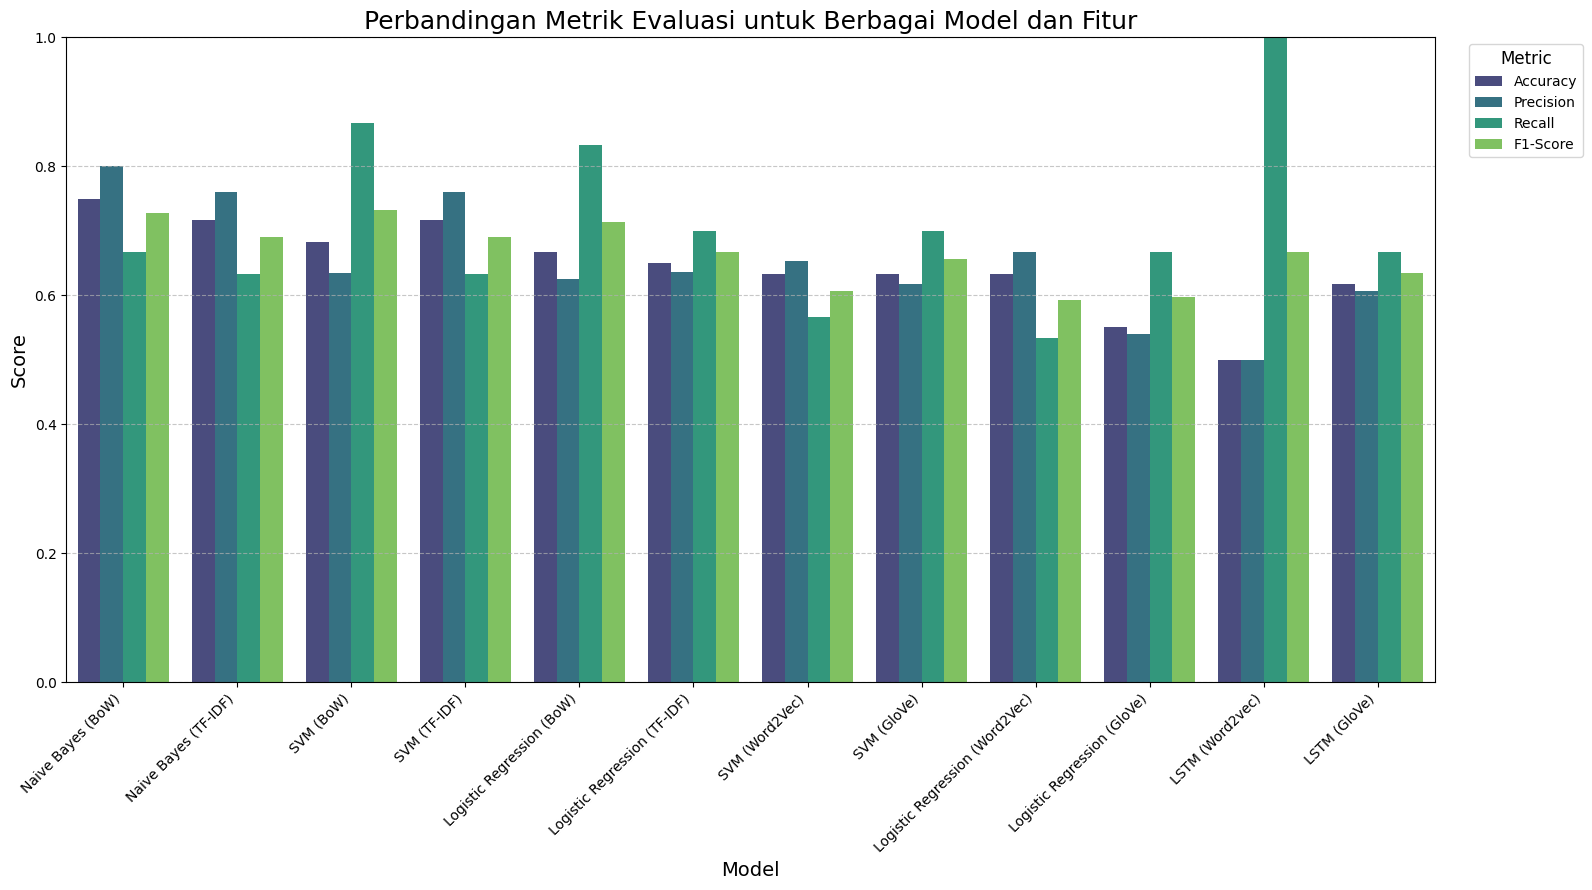

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mempersiapkan data untuk visualisasi
# 'Melt' DataFrame agar mudah diplot dengan Seaborn
metrics_df_final = results_df.melt(id_vars=['Model'],
                             value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                             var_name='Metric',
                             value_name='Score')

plt.figure(figsize=(16, 9))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df_final, palette='viridis')
plt.title('Perbandingan Metrik Evaluasi untuk Berbagai Model dan Fitur', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Memutar label model agar tidak bertumpuk
plt.yticks(fontsize=10)
plt.ylim(0, 1) # Skala Y dari 0 hingga 1 untuk metrik
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi dan tabel hasil evaluasi (results_df) yang telah kita buat, mari kita bandingkan mana yang menunjukkan performa terbaik:

Perbandingan Performa Model dan Ekstraksi Fitur:
Naive Bayes (BoW) adalah yang Terbaik dalam Akurasi dan Presisi:

Akurasi Tertinggi: Naive Bayes dengan fitur Bag of Words (BoW) mencapai akurasi 0.7500, yang merupakan yang tertinggi di antara semua model.

Presisi Tertinggi: Model ini juga memiliki presisi tertinggi yaitu 0.8000.
Ini menunjukkan bahwa Naive Bayes, meskipun sederhana, sangat efektif dalam mengklasifikasikan ulasan dengan fitur frekuensi kata langsung, dan bagus dalam menghindari false positives.

SVM (BoW) Unggul dalam Recall dan F1-Score:

Recall Tertinggi: SVM dengan fitur Bag of Words (BoW) memiliki recall tertinggi yang signifikan, yaitu 0.8667. Ini berarti model ini sangat baik dalam mengidentifikasi sebagian besar ulasan positif yang sebenarnya (minim false negatives).

F1-Score Tertinggi: Model ini juga mencapai F1-Score tertinggi yaitu 0.7324, menunjukkan keseimbangan terbaik antara presisi dan recall.

TF-IDF vs. BoW pada Model Tradisional:
Untuk Naive Bayes, BoW memberikan akurasi dan presisi yang sedikit lebih tinggi daripada TF-IDF.
Untuk SVM dan Logistic Regression, performa BoW dan TF-IDF cukup sebanding, atau TF-IDF sedikit lebih rendah.
Ini menunjukkan bahwa untuk dataset ini, representasi sederhana dari frekuensi kata (BoW) sangat kuat.

Word2Vec dan GloVe dengan Model Tradisional (SVM, Logistic Regression):
Secara umum, Word2Vec dan GloVe ketika digabungkan dengan SVM atau Logistic Regression menunjukkan performa yang lebih rendah dalam hal akurasi dan F1-Score dibandingkan dengan BoW atau TF-IDF.
Misalnya, SVM (Word2Vec) memiliki akurasi 0.6333 dan F1-Score 0.6071, sedangkan SVM (BoW) jauh lebih tinggi.

LSTM (Deep Learning Model):
LSTM (Word2Vec) menunjukkan akurasi dan presisi yang sangat rendah (0.5000) tetapi recall sempurna (1.0000). Ini adalah indikasi kuat bahwa model ini cenderung mengklasifikasikan hampir semua hal sebagai kelas positif, sehingga menghasilkan banyak false positives. Ini menunjukkan model tidak belajar dengan baik atau mengalami overfitting yang parah pada kelas mayoritas jika ada imbalance kelas.

LSTM (GloVe) menunjukkan performa yang sedikit lebih baik dari LSTM (Word2Vec) dalam akurasi dan presisi, tetapi masih lebih rendah dari model tradisional.

Kesimpulan dan Saran:
Untuk dataset 300 entri ini, model tradisional dengan ekstraksi fitur sederhana (BoW atau TF-IDF) menunjukkan performa yang jauh lebih superior dibandingkan dengan pendekatan berbasis embeddings (Word2Vec, GloVe) dan model deep learning (LSTM).

Naive Bayes (BoW) adalah pemenang mutlak dalam hal akurasi dan presisi, membuatnya menjadi pilihan terbaik jika Anda ingin model yang sangat akurat dan presisi.

SVM (BoW) adalah pilihan terbaik jika Anda memprioritaskan recall (menemukan semua ulasan positif) dan F1-Score (keseimbangan presisi dan recall).

Performa buruk dari model LSTM mengindikasikan bahwa dataset yang terlalu kecil sangat membatasi kemampuan model deep learning untuk belajar pola yang bermakna. Model deep learning biasanya membutuhkan data yang jauh lebih banyak untuk dapat mengungguli model tradisional.

Jadi, berdasarkan hasil ini, Naive Bayes dengan Bag of Words atau SVM dengan Bag of Words adalah pilihan terbaik untuk klasifikasi sentimen pada dataset Anda ini.